# Pymaceuticals

## Observations

*    The first chart displayed in this notebook is a bar graph showing the [overall change in tumor volume](#Tumor-Volume-Change-per-Drug) in mice treated with one of three drugs along or placebo.  Out of the three drugs (Capomulin, Infubinol, and Ketapril), only Capomulin resulted in a net mean reduction in tumor size over the 45 days of treatment.  The other two therapies showed tumor growth comparable to placebo.  Thus, it is clear Capomulin has some therapeutic affect in the treatment of murine tumors relative to the others.


*    The observation above is buttressed by a time-series look at tumor volume. [This chart](#Tumor-Volume-Change-by-Timepoint) displays the change in mean tumor volume over time for each drug and placebo.  Again, Capomulin demonstrates a steady decrease compared to the other two therapies.  Capomulin shows an approximate decrease in volume of 10 $mm^3$ while the others, including placebo, show an increase in mean tumor size of 20 to 25 $mm^3$.


*    An additional attribute was monitored during the study.  Metastatic sites were counted at each timepoint to determine if the drug treatments affected tumor proliferation.  The number of [metastatic sites by timepoint ](#Metastatic-Sites-by-Timepoint) grew for all trial drugs in addition to placebo.  However, the growth was observably slower with Capomulin.  Infubinol showed the next-slowest growth with Ketapril being comparable to placebo.  It is also more apparent visually that the variability between mice outcomes is lower for Capomulin.  This is deduced from the shorter standard error lines present on the data markers in the Capomulin series.  Of note is a slight plateau in metastasis for Capomulin and Infubinol.  This could be due to variability in the timepoint data but may indicate an upper limit on the growth of metatstatic sites.  Additional research for a longer period would be required to confirm.


*    Finally, the survival rates of mice were plotted for each drug and placebo and can be viewed [here](#Survival-Rates).  Three mice died in the Capomulin arm while all others lost approximately 3/4 their respective population.  Capomulin shows a clear advantage in survival rate.

In [1]:
#Don't have to call plt.show()
%matplotlib inline

In [2]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
#Load data from files
mouse_file = os.path.join('.','data','mouse_drug_data.csv')
trial_file = os.path.join('.','data','clinicaltrial_data.csv')

mouse_data_df = pd.read_csv(mouse_file)
clin_data_df = pd.read_csv(trial_file)

clin_data_df.head(15)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0
5,h246,0,45.0,0
6,p189,0,45.0,0
7,n923,0,45.0,0
8,q119,0,45.0,0
9,f993,0,45.0,0


In [4]:
mouse_data_df.head(15)

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn
5,o848,Stelasyn
6,z314,Stelasyn
7,g989,Stelasyn
8,m269,Stelasyn
9,a963,Stelasyn


In [5]:
#Get count of mice per drug
count_per_drug = mouse_data_df['Drug'].value_counts()

#There are 9 drugs plus a single placebo. We're only interested in Capomulin, Infubinol, Ketapril, and Placebo.
#And, there are 25 mice for each drug/placebo
count_per_drug

Placebo      25
Ketapril     25
Propriva     25
Stelasyn     25
Infubinol    25
Naftisol     25
Ramicane     25
Capomulin    25
Ceftamin     25
Zoniferol    25
Name: Drug, dtype: int64

In [6]:
#How many time points do we have?
num_time_points = clin_data_df['Timepoint'].value_counts()

#Our timepoints start at zero and end at 45 days in increments of 5
num_time_points

0     250
5     238
10    223
15    207
20    195
25    183
30    171
35    154
40    142
45    130
Name: Timepoint, dtype: int64

In [7]:
#Grab the indexed timepoints to be used as an x-axis in plots
timepoints = num_time_points.index

#Assign our drugs of interest to a variable
study_drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

#Colors Array
drug_colors = ['#DB2B30','#03A6A6','#F78C38','#4F4F4E']

In [8]:
#Merge dataframes on Mouse ID
clin_mice_df = pd.merge(mouse_data_df, clin_data_df, on="Mouse ID")
clin_mice_df.head(10)

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


In [9]:
#Filter the dataframe by the drugs of interest and placebo
subset_df = clin_mice_df[clin_mice_df['Drug'].isin(study_drugs)]
subset_df.tail()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1
1905,j235,Placebo,20,52.942902,1


In [10]:
#Use the .agg function to perform all needed group calculations summarized in a single dataframe
all_group_calcs = subset_df.groupby(['Drug', 'Timepoint']).agg({'Tumor Volume (mm3)':['mean', 'sem'], 
                                                                'Metastatic Sites':['mean', 'sem'], 
                                                                'Mouse ID':'count'})
#Pivot the drug name index to a new column header level to yield hierarchy of Attribute --> Calculation --> Drug Name
unstacked_all = all_group_calcs.unstack(level=0)
unstacked_all

Tumor Volume (mm3)                                             \
                        mean                                        sem   
Drug               Capomulin  Infubinol   Ketapril    Placebo Capomulin   
Timepoint                                                                 
0                  45.000000  45.000000  45.000000  45.000000  0.000000   
5                  44.266086  47.062001  47.389175  47.125589  0.448593   
10                 43.084291  49.403909  49.582269  49.423329  0.702684   
15                 42.064317  51.296397  52.399974  51.359742  0.838617   
20                 40.716325  53.197691  54.920935  54.364417  0.909731   
25                 39.939528  55.715252  57.678982  57.482574  0.881642   
30                 38.769339  58.299397  60.994507  59.809063  0.934460   
35                 37.816839  60.742461  63.371686  62.420615  1.052241   
40                 36.958001  63.162824  66.068580  65.052675  1.223608   
45                 36.236114  65.755562  70.662958  68.084082  1.223977   

                                        Metastatic Sites                      \
                                                    mean                       
Drug      Infubinol  Ketapril   Placebo        Capomulin Infubinol  Ketapril   
Timepoint                                                                      
0          0.000000  0.000000  0.000000         0.000000  0.000000  0.000000   
5          0.235102  0.264819  0.218091         0.160000  0.280000  0.304348   
10         0.282346  0.357421  0.402064         0.320000  0.666667  0.590909   
15         0.357705  0.580268  0.614461         0.375000  0.904762  0.842105   
20         0.476210  0.726484  0.839609         0.652174  1.050000  1.210526   
25         0.550315  0.755413  1.034872         0.818182  1.277778  1.631579   
30         0.631061  0.934121  1.218231         1.090909  1.588235  2.055556   
35         0.984155  1.127867  1.287481         1.181818  1.666667  2.294118   
40         1.055220  1.158449  1.370634         1.380952  2.100000  2.733333   
45         1.144427  1.453186  1.351726         1.476190  2.111111  3.363636   

                                                             Mouse ID  \
                          sem                                   count   
Drug        Placebo Capomulin Infubinol  Ketapril   Placebo Capomulin   
Timepoint                                                               
0          0.000000  0.000000  0.000000  0.000000  0.000000        25   
5          0.375000  0.074833  0.091652  0.098100  0.100947        25   
10         0.833333  0.125433  0.159364  0.142018  0.115261        25   
15         1.250000  0.132048  0.194015  0.191381  0.190221        24   
20         1.526316  0.161621  0.234801  0.236680  0.234064        23   
25         1.941176  0.181818  0.265753  0.288275  0.263888        22   
30         2.266667  0.172944  0.227823  0.347467  0.300264        22   
35         2.642857  0.169496  0.224733  0.361418  0.341412        22   
40         3.166667  0.175610  0.314466  0.315725  0.297294        21   
45         3.272727  0.202591  0.309320  0.278722  0.304240        21   

                                      
                                      
Drug      Infubinol Ketapril Placebo  
Timepoint                             
0                25       25      25  
5                25       23      24  
10               21       22      24  
15               21       19      20  
20               20       19      19  
25               18       19      17  
30               17       18      15  
35               12       17      14  
40               10       15      12  
45                9       11      11

In [11]:
#Do some additional shaping to yield a dataframe with overall change in tumor size for each drug

#Select tumor volume mean values from parent dataframe and reset index for further shaping
tumordf1 = all_group_calcs['Tumor Volume (mm3)']['mean'].reset_index()

#Select only the 0 and 45 day timepoints from tumordf1 and pivot the chart such that 0 and 45 are column headers
tumordf2 = tumordf1.loc[tumordf1['Timepoint'].isin([0,45])].pivot(index='Drug', columns='Timepoint', values='mean')

#Perform the % change calculation and add to new column in tumordf2
tumordf2['Change'] = round(((tumordf2[45] - tumordf2[0])/tumordf2[45])*100,1)

tumordf2

Timepoint,0,45,Change
Drug,,,
Capomulin,45.0,36.236114,-24.2
Infubinol,45.0,65.755562,31.6
Ketapril,45.0,70.662958,36.3
Placebo,45.0,68.084082,33.9


In [18]:
#Make the charts a bit bigger using the rcParams attribute

# Current size is 6x4
fig_size = plt.rcParams["figure.figsize"]

# Set figure width to 8 and height to 6
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

##### Tumor Volume Change per Drug

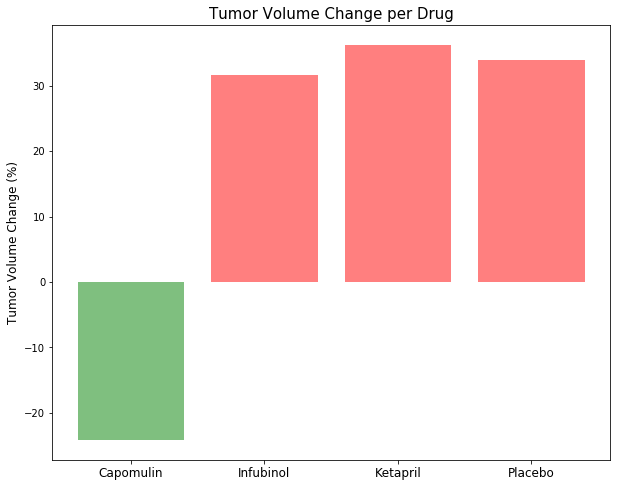

In [20]:
#Plot bar graph of overall change in tumor size per drug

#Number of x positions for chart
y_pos = np.arange(len(study_drugs))

#Values to plot
plot_vals = tumordf2['Change']

#Create colors based on value of change
bar_colors = []

for number in plot_vals:
    if number <= 0:
        bar_colors.append('g')
    else:
        bar_colors.append('r')
        
#Create bar graph container
plt.bar(y_pos, plot_vals, align='center', alpha=0.5,color=bar_colors)

#Formatting and labeling
plt.xticks(y_pos, study_drugs)
plt.ylabel('Tumor Volume Change (%)',fontsize=12)
plt.title('Tumor Volume Change per Drug',fontsize=15)
plt.tick_params(axis='x',labelsize=12)
plt.savefig('Images/tumor_change.png',bbox_inches='tight')

In [21]:
#Define function that will take a dataframe column of interest, an x-axis list, and an array of drug names 
#A for loop will iterate through drug list and plot an errorbar scatter chart by selecting the drug from a dataframe
def printChart(measure_col,x_axis,study_drugs):
    for drug in study_drugs:
        curr_index = study_drugs.index(drug)
        curr_color = drug_colors[curr_index]
        y_vals = unstacked_all[measure_col]['mean'][drug]
        errors = unstacked_all[measure_col]['sem'][drug]
        plt.errorbar(x_axis,y_vals,yerr=errors,fmt='s',color=curr_color)
    plt.ylabel(measure_col,fontsize=12)
    plt.xlabel("Timepoints",fontsize=12)
    plt.legend(study_drugs,fontsize=12)
    plt.tick_params(axis='both',labelsize=12)
       

##### Tumor Volume Change by Timepoint

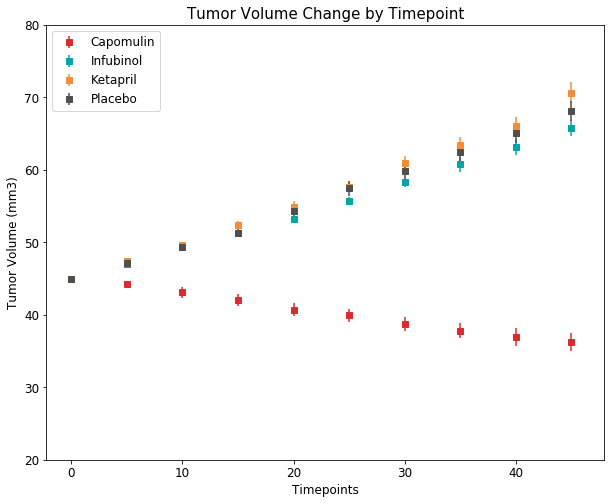

In [22]:
#Print tumor volumes by timepoint for each drug/placebo
printChart('Tumor Volume (mm3)',timepoints,study_drugs)
plt.title('Tumor Volume Change by Timepoint',fontsize=15)
plt.ylim(20, 80)
plt.xlim(right=48)
plt.savefig('Images/tumor_volume.png',bbox_inches='tight')

##### Metastatic Sites by Timepoint

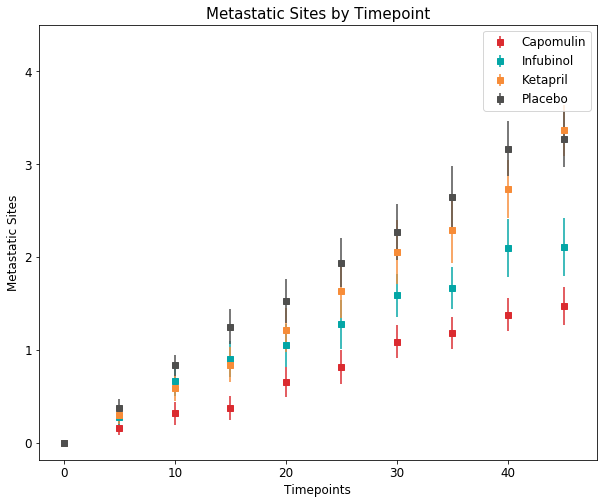

In [23]:
#Print metastatic sites by timepoint for each drug
printChart('Metastatic Sites',timepoints,study_drugs)
plt.title('Metastatic Sites by Timepoint',fontsize=15)
plt.ylim(top=4.5)
plt.xlim(right=48)
plt.savefig('Images/met_sites.png',bbox_inches='tight')

##### Survival Rate

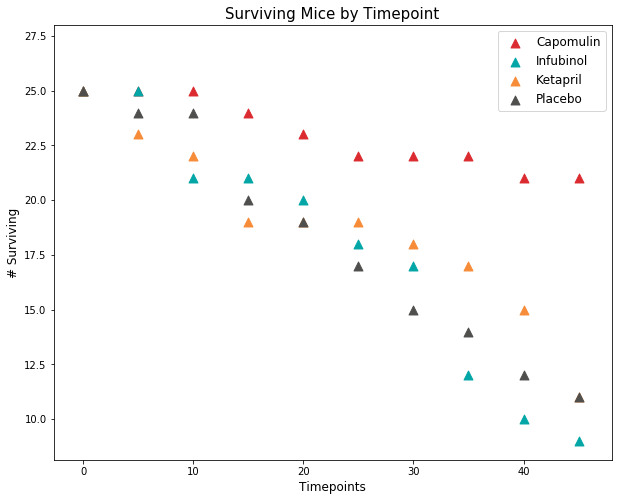

In [24]:
#Plot of surviving mice along timepoints
for drug in study_drugs:
        curr_index = study_drugs.index(drug)
        curr_color = drug_colors[curr_index]
        y_vals = unstacked_all['Mouse ID']['count'][drug]
        plt.scatter(timepoints,y_vals,color=curr_color,marker='^',s=80)
plt.ylabel("# Surviving",fontsize=12)
plt.xlabel("Timepoints",fontsize=12)
plt.title('Surviving Mice by Timepoint',fontsize=15)
plt.legend(study_drugs,fontsize=12)
plt.ylim(top=28)
plt.xlim(right=48)
plt.savefig('Images/survival.png',bbox_inches='tight')